# MALARIA LASSIFICATION  BY TRANSFER LEARNING

WE WILL BE CLASSIFYING WHETHER THERSON HAS MALARIA OR NOT BY CLASSIFYING THE X-RAY SCANS

OF INFECTED AND UNINFECTED IMAGES.

##### WE WILL CLASSIFY IMAGES USING TRANSFER LEARNING TECHNIQUE(VGG 19) 

Transfer Learning: Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge


gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while 


learning to recognize cars could apply when trying to recognize trucks.

In [44]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Dense,Lambda,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [2]:
# RE-SIZE ALL THE IMAGES TO THIS
IMAGE_SIZE = [224,224]
train=r'C:\Users\Chaitanya Kaul\Dataset\Dataset\Train'
valid_path= r'C:\Users\Chaitanya Kaul\Dataset\Dataset\Test'

In [3]:
# IMPORTING THE VGG 19 LIBRARY AS SHOWN AND ADDING PRE PROCESSING LAYER TO THE FRONT OF VGG
# WE WILL USE IMAGENET WEIGHTS

vgg19= VGG19(input_shape= IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [4]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False


In [6]:
# useful for getting number of output classes, here we have 2 i.e Parasite and uninfected
folders= glob(r'C:/Users/Chaitanya Kaul/Dataset/Dataset/Train/*')

In [7]:
folders

['C:/Users/Chaitanya Kaul/Dataset/Dataset/Train\\Parasite',
 'C:/Users/Chaitanya Kaul/Dataset/Dataset/Train\\Uninfected']

In [8]:
# OUR LAYERS- YOU CAN ADD MORE IF YOU WANT
# FLATTENING THE LAST LAYER OF VGG19
x= Flatten()(vgg19.output)

In [9]:
# we will be having 2 nodes in our output layer because we have 2 classes to classify
prediction= Dense(len(folders),activation='softmax')(x)

# creating a model
model= Model(inputs=vgg19.input,outputs=prediction)

In [10]:
# viewing the structure of model
# in last layer we can see that we have  2 nodes
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# TELLING THE MODEL WHAT COST AND OPTIMIZATION METHOD TO USE
# we are using adam optimizer
# we are using categorical_cross entropy because we have 2 nodes in last layer
model.compile(
           loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy']
)

In [12]:
# USING THE IMAGE DATA GENERATOR TO IMPORT IMAGES FROM DATASET
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

# WE DONT USE IMAGE AUGMENTATION ON TEST DATA EXCPET RESCALIN
test_datagen= ImageDataGenerator(rescale=1./255)

In [13]:
# MAKE SURE YOU PROVIDE THE SAME TARGET SIZE AS INITIALIZED FOR THE IMAGE SIZE
training_set= train_datagen.flow_from_directory(r'C:\Users\Chaitanya Kaul\Dataset\Dataset\Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 416 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(r'C:\Users\Chaitanya Kaul\Dataset\Dataset\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 5 steps
Epoch 1/50
13/13 [==============================] - 226s 17s/step - loss: 1.3418 - accuracy: 0.5529 - val_loss: 0.6776 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 228s 18s/step - loss: 0.7851 - accuracy: 0.6394 - val_loss: 1.3847 - val_accuracy: 0.4328
Epoch 3/50
13/13 [==============================] - 228s 18s/step - loss: 0.5088 - accuracy: 0.7692 - val_loss: 0.6128 - val_accuracy: 0.6716
Epoch 4/50
13/13 [==============================] - 231s 18s/step - loss: 0.3959 - accuracy: 0.8149 - val_loss: 0.4199 - val_accuracy: 0.6716
Epoch 5/50
13/13 [==============================] - 224s 17s/step - loss: 0.4116 - accuracy: 0.8029 - val_loss: 0.5429 - val_accuracy: 0.7090
Epoch 6/50
13/13 [==============================] - 224s 17s/step - loss: 0.3101 - accuracy: 0.8774 - val_loss: 0.3530 - va

#### WE CAN SEE THAT WE ARE GETTING AN ACCURACY OF 97.60% IN OUR FINAL EPOCH WHICH IS PRETTY GOOD

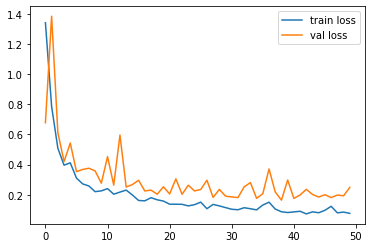

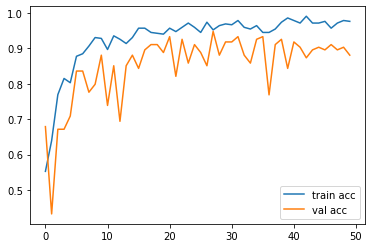

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
 # save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [20]:
# our prediction variable
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[6.5191501e-01, 3.4808499e-01],
       [9.9819070e-01, 1.8092669e-03],
       [9.9981040e-01, 1.8967474e-04],
       [9.9983883e-01, 1.6110322e-04],
       [9.9819958e-01, 1.8004152e-03],
       [4.1652233e-03, 9.9583471e-01],
       [9.8880357e-01, 1.1196445e-02],
       [9.9976856e-01, 2.3145879e-04],
       [1.5616649e-01, 8.4383351e-01],
       [9.6560019e-01, 3.4399830e-02],
       [2.9369513e-02, 9.7063047e-01],
       [9.9978083e-01, 2.1915308e-04],
       [9.9523610e-01, 4.7639143e-03],
       [6.5738040e-01, 3.4261963e-01],
       [9.6198362e-01, 3.8016312e-02],
       [9.9997926e-01, 2.0719604e-05],
       [9.9999368e-01, 6.2647350e-06],
       [9.6813053e-01, 3.1869430e-02],
       [9.8431128e-01, 1.5688688e-02],
       [3.3826303e-01, 6.6173697e-01],
       [1.2413622e-02, 9.8758638e-01],
       [9.9939990e-01, 6.0006807e-04],
       [3.1772801e-01, 6.8227202e-01],
       [9.5256180e-01, 4.7438174e-02],
       [1.2505566e-01, 8.7494439e-01],
       [9.8744130e-01, 1.

In [22]:
# argmax is used to get the index of maximum value from our above predictions
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
# looking at our predictions
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [27]:
# LOADING THE MODEL
from tensorflow.keras.preprocessing import image
model=load_model('model_vgg19.h5')

In [28]:
# PATH OF AN IMAGE FROM OUR TEST DATASET
img= image.load_img(r'C:\Users\Chaitanya Kaul\Dataset\Dataset\Test\Uninfected\2.png',target_size=(224,224))

In [37]:
# CONVERTING THE IMAGE INTO ARRAY
y=image.img_to_array(img)
y

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [38]:
# LOOKING AT THE SHAPE OF THE IMAGE---> 3D
y.shape

(224, 224, 3)

In [39]:
y=y/255

In [40]:
# EXPANDING THE DIMENSIONS

y=np.expand_dims(y,axis=0)
img_data=preprocess_input(y)
img_data.shape


(1, 224, 224, 3)

In [41]:
model.predict(img_data)

array([[0.00739761, 0.9926024 ]], dtype=float32)

In [42]:
a= np.argmax(model.predict(img_data),axis=1)

In [43]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")


Uninfected


OUR PREDICTION IS CORRECT HERE